In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Primeiro `Modelo Logístico` com o banco de dados

In [23]:
dados = pd.read_csv('dados_filtrados.csv',sep=';').dropna()
dados.head(5)

,vacina_descricao_dose,paciente_idade,paciente_racaCor_valor,paciente_endereco_uf,vacina_categoria_nome,paciente_enumSexoBiologico
0,1ª Dose,38.0,AMARELA,SP,Faixa Etária,M
1,3ª Dose,5.0,BRANCA,RS,Faixa Etária,M
2,1ª Dose,48.0,SEM INFORMACAO,SP,Faixa Etária,M
3,1ª Dose,77.0,SEM INFORMACAO,MG,Faixa Etária,F
4,Reforço,63.0,SEM INFORMACAO,SP,Faixa Etária,M


**Definindo os tipos dos dados**

In [24]:
dados = dados.astype({
    'vacina_descricao_dose' : 'category',
    'paciente_idade' : 'int8',
    'paciente_racaCor_valor' : 'category',
    'paciente_endereco_uf' : 'category',
    'vacina_categoria_nome' : 'category',
    'paciente_enumSexoBiologico' : 'category'
})

**Padronização dos dados da coluna `paciente_idade`**

Esse passo é necessário para aumentar a acurácia do modelo pois distribui os dados em um range de média 0 e desvio padrão e 1.

In [25]:
scaler = StandardScaler()
scaler_fit = scaler.fit_transform(dados['paciente_idade'].to_frame())

**Converter variáveis categóricas em variáveis booleanas**

Assim, é possível utiliza-las no modelo de Regressão Logística.
A função `get_dummies()` retorna um dataframe para cada categoria onde as células são valores booleanos

In [44]:
uf = pd.get_dummies(dados["paciente_endereco_uf"],drop_first=True).reset_index(drop=True)
sexobio = pd.get_dummies(dados["paciente_enumSexoBiologico"],drop_first=True).reset_index(drop=True)
cor = pd.get_dummies(dados["paciente_racaCor_valor"],drop_first=True).reset_index(drop=True)
categoria = pd.get_dummies(dados["vacina_categoria_nome"],drop_first=True).reset_index(drop=True)

FeaturesProcessadas = pd.concat([
    # pd.Series(scaler_fit.flatten(),name="Paciente Idade"),
    uf,
    sexobio,
    cor,
    categoria
    ], axis=1)

FeaturesProcessadas.columns = FeaturesProcessadas.columns.astype(str)


TargetProcessado = dados["vacina_descricao_dose"].reset_index(drop=True)

In [45]:
FeaturesProcessadas.columns

Index(['AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',
       'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE',
       'SP', 'TO', 'XX', 'I', 'M', 'BRANCA', 'INDIGENA', 'PARDA', 'PRETA',
       'SEM INFORMACAO', 'Faixa Etária', 'Forças Armadas (membros ativos)',
       'Forças de Segurança e Salvamento',
       'Funcionário do Sistema de Privação de Liberdade', 'Gestantes',
       'Outros', 'Pessoas Institucionalizadas', 'Pessoas com Deficiência',
       'Pessoas de 60 anos ou mais institucionalizadas',
       'Pessoas em Situação de Rua', 'População Privada de Liberdade',
       'Povos Indígenas', 'Povos e Comunidades Tradicionais', 'Puérperas',
       'Trabalhadores Industriais', 'Trabalhadores Portuários',
       'Trabalhadores da Educação', 'Trabalhadores de Limpeza Urbana',
       'Trabalhadores de Saúde', 'Trabalhadores de Transporte'],
      dtype='object')

**Separando o banco de dados entre `train` e `test`**

In [46]:
randomState = randint(0,100000)
x_train,x_test,y_train,y_test = train_test_split(FeaturesProcessadas,TargetProcessado, test_size=.3, shuffle=True, random_state=randomState)

**Aplicando o banco de `train` no modelo**

In [47]:
model = DecisionTreeClassifier(splitter='random', class_weight="balanced")
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', splitter='random')

c:\Users\yaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

                     precision    recall  f1-score   support

            1ª Dose       0.43      0.02      0.04     91358
    1ª Dose Dobrada       0.00      0.00      0.00         0
1ª Dose Revacinação       0.00      0.08      0.00       181
         1º Reforço       0.01      0.39      0.02      1381
            2ª Dose       0.32      0.01      0.01     84452
2ª Dose Revacinação       0.00      0.15      0.00       154
         2º Reforço       0.12      0.06      0.08     23757
            3ª Dose       0.04      0.05      0.04      1940
3ª Dose Revacinação       0.00      0.19      0.00        79
         3º Reforço       0.01      0.25      0.02       533
            4ª Dose       0.03      0.67      0.05       476
4ª Dose Revacinação       0.00      0.13      0.00        90
         4º Reforço       0.00      0.76      0.01        54
            5ª Dose       0.00      0.59      0.00        22
5ª Dose Revacinação       0.00      0.00      0.00         8
               Dose    

<Axes: >

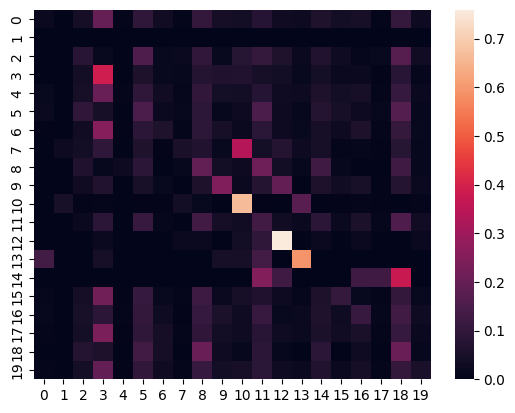

In [48]:
testsResult = model.predict(x_test)
print(classification_report(y_test,testsResult))
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'))

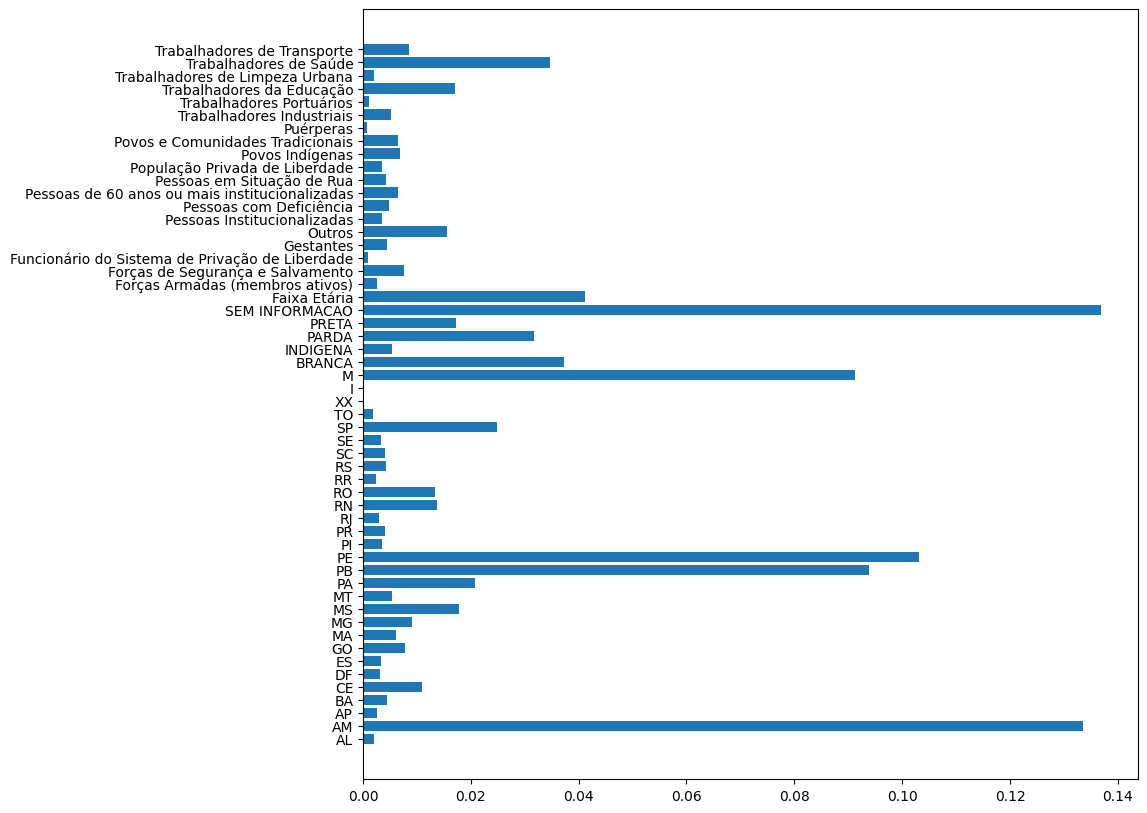

In [49]:
plt.figure(figsize=(10,10))
plt.barh(x_test.columns,model.feature_importances_)
plt.show()

## Simplificando o banco de dados

Dado que a coluna `target` possui muitas categorias distintas (19 opções de descrição para a dose da vacina), o modelo tem dificuldade em prever o caso em que o paciente tomou a `3ª dose`.
Para melhorar a quantidade de dados disponíveis, essa coluna irá ser simplificada em rótulos.

In [32]:
display(pd.Series(dados['vacina_descricao_dose'].unique()).to_frame())

,0
0,1ª Dose
1,3ª Dose
2,Reforço
3,2ª Dose
4,Única
5,2º Reforço
6,Dose
7,Revacinação
8,Dose Adicional
9,1º Reforço


A simplificação será feita da seguinte maneira:

1ª Dose : `1ª Dose Revacinação`, `1ª Dose Dobrada`, `1º Reforço`, `Única`, `Reforço`, `Dose` e `Revacinação`\
2ª Dose: `2º Reforço`, `2ª Dose Revacinação`, `Dose Adicional`\
3ª Dose: `3º Reforço` e `3ª Dose Revacinação`\
4ª Dose: `4º Reforço` e `4ª Dose Revacinação`\
5ª Dose: `5ª Dose Revacinação`



In [50]:
TargetProcessado2 = dados["vacina_descricao_dose"].astype('string')

TargetProcessado2.loc[TargetProcessado2.isin(["1ª Dose Revacinação","1ª Dose Dobrada","1º Reforço","Única","Reforço","Dose","Revacinação"])] = "1ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["2º Reforço","2ª Dose Revacinação","Dose Adicional"])] = "2ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["3º Reforço","3ª Dose Revacinação"])] = "3ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["4º Reforço","4ª Dose Revacinação"])] = "4ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["5ª Dose Revacinação"])] = "5ª Dose"

TargetProcessado2 = TargetProcessado2.astype('category')

In [51]:
(TargetProcessado2.value_counts(normalize=True)*100).round(2)

vacina_descricao_dose
1ª Dose    61.81
2ª Dose    37.10
3ª Dose     0.87
4ª Dose     0.22
5ª Dose     0.01
Name: proportion, dtype: float64

**Separando a nova coluna `Target` entre `train` e `test`**

In [52]:
x_train,x_test,y_train,y_test = train_test_split(FeaturesProcessadas,TargetProcessado2, test_size=.3, shuffle=True, random_state=randomState)

**Aplicando o novo `Target` ao modelo**

In [53]:
model = DecisionTreeClassifier(splitter='random', class_weight="balanced")
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', splitter='random')

**Resultados do modelo**

              precision    recall  f1-score   support

     1ª Dose       0.63      0.40      0.49    184402
     2ª Dose       0.38      0.33      0.35    110869
     3ª Dose       0.02      0.28      0.03      2552
     4ª Dose       0.02      0.61      0.04       620
     5ª Dose       0.00      0.43      0.00        30

    accuracy                           0.37    298473
   macro avg       0.21      0.41      0.18    298473
weighted avg       0.53      0.37      0.43    298473



<Axes: >

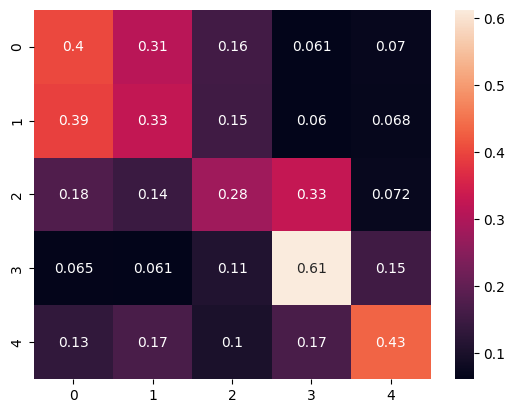

In [54]:
testsResult = model.predict(x_test)
print(classification_report(y_test,testsResult))
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'),annot=True)

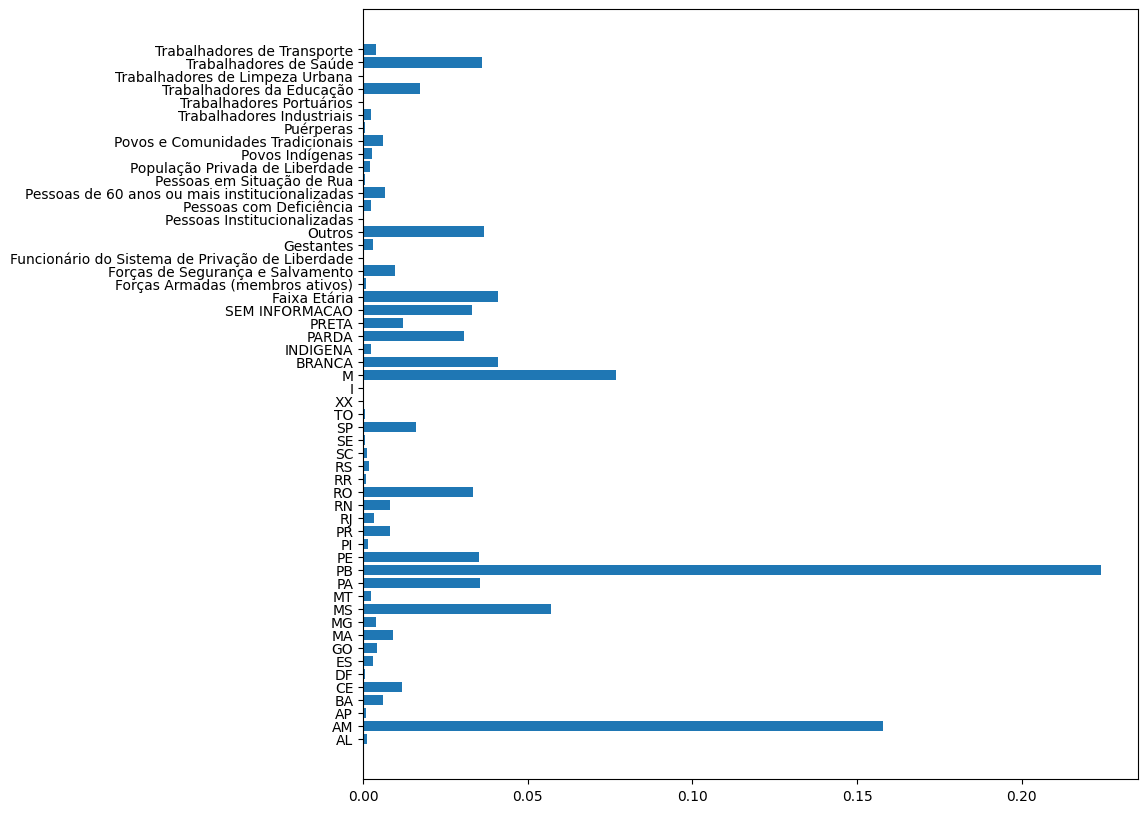

In [55]:
plt.figure(figsize=(10,10))
plt.barh(x_test.columns,model.feature_importances_)
plt.show()

## Simplificando ainda mais a coluna `Target`

Agora, a coluna foi definida entre os valores `True` e `False` para se o paciente tomou a partir da 2ª dose da vacina.

In [56]:
TargetProcessado3 = TargetProcessado2.isin(["2ª Dose","3ª Dose","4ª Dose","5ª Dose"])
print(TargetProcessado3.value_counts(normalize=True))

vacina_descricao_dose
False    0.618053
True     0.381947
Name: proportion, dtype: float64


In [57]:
x_train,x_test,y_train,y_test = train_test_split(FeaturesProcessadas,TargetProcessado3, test_size=.3, shuffle=True, random_state=randomState)

In [58]:
model = DecisionTreeClassifier(splitter='best', class_weight="balanced")
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

              precision    recall  f1-score   support

       False       0.63      0.62      0.63    184402
        True       0.40      0.40      0.40    114071

    accuracy                           0.54    298473
   macro avg       0.51      0.51      0.51    298473
weighted avg       0.54      0.54      0.54    298473



<Axes: >

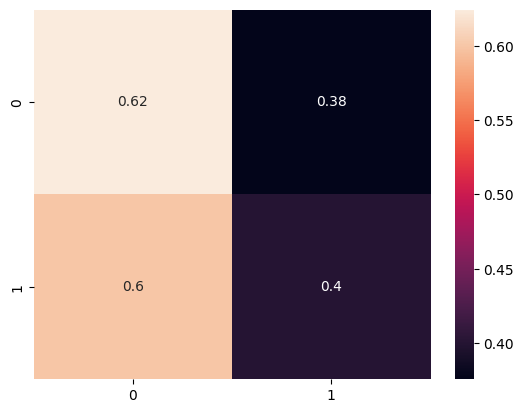

In [59]:
testsResult = model.predict(x_test)
print(classification_report(y_test,testsResult))
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'),annot=True)

<BarContainer object of 55 artists>

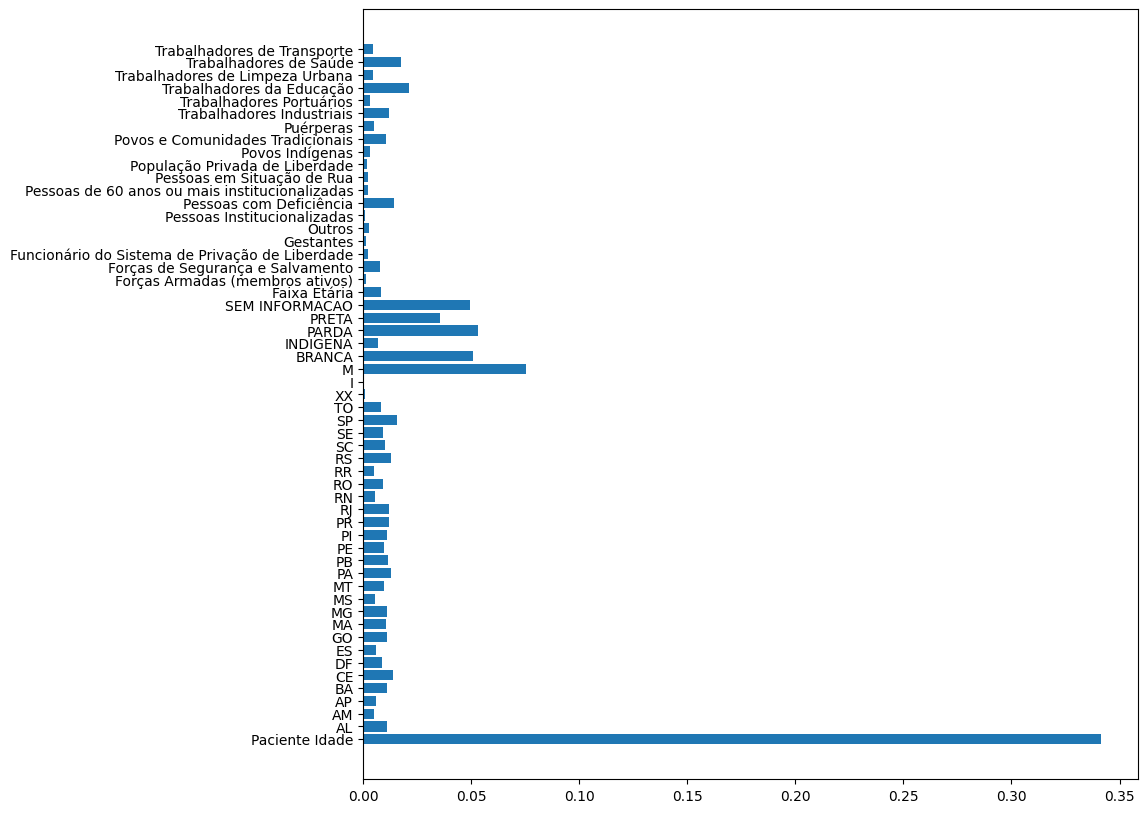

In [43]:
plt.figure(figsize=(10,10))
plt.barh(x_test.columns,model.feature_importances_)